<a href="https://colab.research.google.com/github/shumail1460/Machine-Learning/blob/main/Model1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.regularizers import l1
import matplotlib.pyplot as plt

Data loading and preprocessing completed successfully!
Epoch 1/40


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


604/604 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.8223 - loss: 0.6239 - val_accuracy: 0.8346 - val_loss: 0.3942
Epoch 2/40
604/604 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8308 - loss: 0.4047 - val_accuracy: 0.8324 - val_loss: 0.3991
Epoch 3/40
604/604 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8339 - loss: 0.3950 - val_accuracy: 0.8342 - val_loss: 0.3863
Epoch 4/40
604/604 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8408 - loss: 0.3845 - val_accuracy: 0.8311 - val_loss: 0.3848
Epoch 5/40
604/604 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8382 - loss: 0.3828 - val_accuracy: 0.8349 - val_loss: 0.3821
Epoch 6/40
604/604 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8371 - loss: 0.3811 - val_accuracy: 0.8326 - val_loss: 0.3792
Epoch 7/40
604/604 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8365 - loss: 0.3852 - val_accuracy: 0.8282 - val_loss: 0.3917
Epoch 8/40
604/604 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8316 - loss: 0.3875 - val_accuracy: 0.8320 - val_

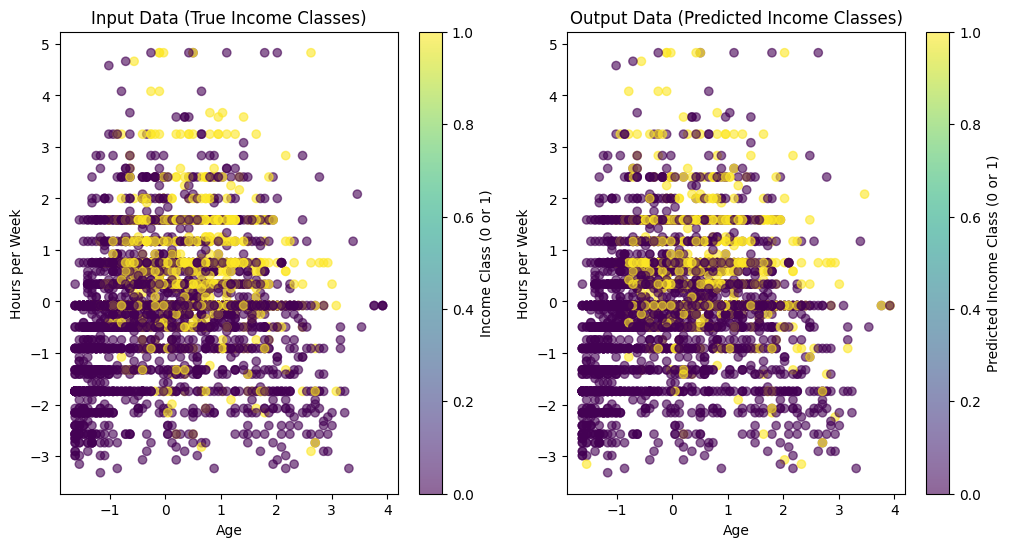

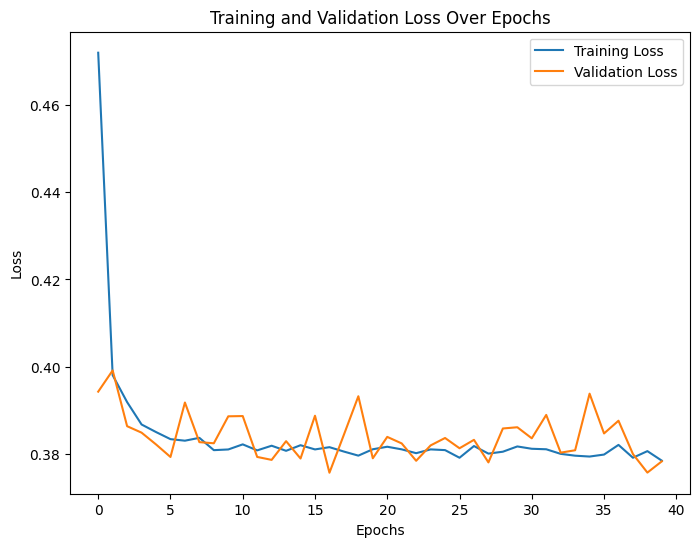

In [5]:
# Dataset URL
dataset_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data'

# Load dataset
column_names = [
    'age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status',
    'occupation', 'relationship', 'race', 'sex', 'capital_gain', 'capital_loss',
    'hours_per_week', 'native_country', 'income'
]
data = pd.read_csv(dataset_url, header=None, names=column_names, na_values=' ?')

# Drop rows with missing values
data.dropna(inplace=True)

# Encode categorical variables
label_encoders = {}
for column in data.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le

# Split the data into features and target
X = data.drop('income', axis=1)
y = data['income']  # 0 for <=50K, 1 for >50K

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# initialize
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print("Data loading and preprocessing completed successfully!")

# model built krta h
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],),
          kernel_regularizer=l1(0.003)),
    Dense(32, activation='relu', kernel_regularizer=l1(0.003)),
    Dense(1, activation='sigmoid')  # Binary classification
])

# Compile the model with learning rate 0.01
optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Train the model for 40 epochs
history = model.fit(X_train, y_train, epochs=40, batch_size=32, validation_split=0.2)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"\nFinal Training Loss: {history.history['loss'][-1]:.4f}")
print(f"Final Validation Loss: {history.history['val_loss'][-1]:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

# Predict and classify income
predictions = (model.predict(X_test) > 0.5).astype("int32")

# Plot input vs. output data classification
plt.figure(figsize=(12, 6))

# Input data plot (true income classes)
plt.subplot(1, 2, 1)
plt.scatter(X_test[:, 0], X_test[:, 12], c=y_test, cmap='viridis', alpha=0.6)
plt.title("Input Data (True Income Classes)")
plt.xlabel("Age")
plt.ylabel("Hours per Week")
plt.colorbar(label="Income Class (0 or 1)")

# Output data plot (predicted income classes)
plt.subplot(1, 2, 2)
plt.scatter(X_test[:, 0], X_test[:, 12], c=predictions.flatten(), cmap='viridis', alpha=0.6)
plt.title("Output Data (Predicted Income Classes)")
plt.xlabel("Age")
plt.ylabel("Hours per Week")
plt.colorbar(label="Predicted Income Class (0 or 1)")

# Plot training and validation loss
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title("Training and Validation Loss Over Epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()